In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
import os
import PIL
from PIL import Image
import pathlib

In [87]:
## /Users/malikagolshan/Desktop/class_massive
from pathlib import Path


In [3]:
import matplotlib.pyplot as plt

In [4]:
side_len = 128

In [5]:
train_gen = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z15',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False
)

valid_gen = keras.preprocessing.image_dataset_from_directory(
    '/Users/malikagolshan/Desktop/z15',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(side_len, side_len),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False
)

Found 26970 files belonging to 2 classes.
Using 21576 files for training.
Metal device set to: Apple M1


2022-06-05 22:29:19.173494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-05 22:29:19.173850: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 26970 files belonging to 2 classes.
Using 5394 files for validation.


2022-06-05 22:29:22.834192: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-05 22:29:22.834611: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


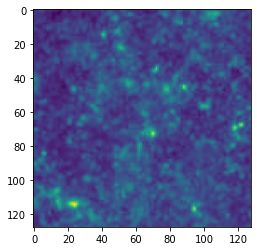

In [6]:
plt.imshow(np.squeeze(next(iter(valid_gen))[0][0]/255))

In [7]:
base_model = keras.Sequential()

In [10]:

#print("Model input shape: {}\n".format(base_model.input_shape))
#print("Model output shape: {}\n".format(base_model.output_shape))
#print("Model number of layers: {}\n".format(len(base_model.layers)))


In [9]:
input_shape= (side_len, side_len, 3)

In [10]:
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

class Gray2VGGInput( Layer ) :
    
    """Custom conversion layer
    """
    def build( self, x ) :
        self.built = True
        return

    def call( self, x ) :
        rgb_x = K.concatenate( [x,x,x], axis=-1 )
        norm_x = rgb_x
        return norm_x

    def compute_output_shape( self, input_shape ) :
        return input_shape[:3] + (3,)

In [19]:
inputs          = keras.Input(shape=(side_len, side_len,1))
vgg_input_image = Gray2VGGInput( name='gray_to_rgb_norm')(inputs)
x               = vgg_input_image
scale_layer     = keras.layers.experimental.preprocessing.Rescaling(scale=1./255)
x = scale_layer(x)
'''
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.GaussianNoise(.0005)(x)
x = keras.layers.Dense(8, activation='relu')(x)
'''
conv_1 = Conv2D(16, (16, 16), activation="relu", padding='same')(x)
conv_1 = Conv2D(16, (16, 16), activation="relu", padding='same')(conv_1)
conv_1 = Conv2D(16, (16, 16), activation="relu", padding='same')(conv_1)
#pool_1 = pool_1 = MaxPooling2D((2, 2))(conv_1) ### had to use MAXpoolig

conv_2 = Conv2D(32, (8, 8),strides= (2,2) ,activation="relu", padding='same')(conv_1)
conv_2 = Conv2D(32, (8, 8),strides= (2,2) ,activation="relu", padding='same')(conv_2)

conv_3 = Conv2D(64, (4, 4),strides= (4,4) ,activation="relu", padding='same')(conv_2)
conv_3 = Conv2D(64, (4, 4),strides= (4,4) ,activation="relu", padding='same')(conv_3)

conv_4 = Conv2D(32, (8, 8),strides= (2,2) ,activation="relu", padding='same')(conv_3)
conv_4 = Conv2D(32, (8, 8),strides= (2,2) ,activation="relu", padding='same')(conv_4)

conv_5 = Conv2D(16, (16, 16), activation="relu", padding='same')(conv_4)
conv_5 = Conv2D(16, (16, 16), activation="relu", padding='same')(conv_5)
conv_5 = Conv2D(3, (16, 16), activation="relu", padding='same')(conv_5)



pool = keras.layers.GlobalAveragePooling2D()(conv_5)


outputs = keras.layers.Dense(1)(pool)
model   = keras.Model(inputs, outputs)



In [ ]:
'''
conv_2 = Conv2D(128, (16, 16),strides= (2,2) ,activation="relu")(pool_1)
conv_2 = Conv2D(128, (16, 16),strides= (2,2) ,activation="relu")(conv_2)
pool_2 = keras.layers.GlobalAveragePooling2D()(conv_2)

conv_3 = Conv2D(256, (8, 8),strides= (4,4) ,activation="relu")(pool_2)
conv_3 = Conv2D(256, (8, 8),strides= (4,4) ,activation="relu")(conv_3)
pool_3 = keras.layers.GlobalAveragePooling2D()(conv_3)

conv_4 = Conv2D(128, (16, 16),strides= (2,2) ,activation="relu")(pool_3)
conv_4 = Conv2D(128, (16, 16),strides= (2,2) ,activation="relu")(conv_4)
pool_4 = keras.layers.GlobalAveragePooling2D()(conv_4)

conv_5 = (Conv2D(64, (32, 32), activation="relu"))(conv_4)
conv_4 = (Conv2D(64, (32, 32), activation="relu"))(conv__4)
conv_4 = (Conv2D(3, (32, 32), activation="relu"))(conv_5)
pool_1 = keras.layers.GlobalAveragePooling2D()(conv_5)
'''

In [21]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [22]:
model.predict(train_gen, steps=4)

2022-06-05 22:40:39.085091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[-6.5748051e-10],
       [ 0.0000000e+00],
       [-5.2274501e-10],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [-2.5725072e-10],
       [-3.7429255e-09],
       [-3.7062849e-11],
       [ 0.0000000e+00],
       [-2.1553146e-09],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [-1.2247772e-09],
       [-7.8130935e-10],
       [-1.2282761e-09],
       [-4.9729307e-11],
       [ 0.0000000e+00],
       [-7.3760514e-10],
       [-1.7346988e-09],
       [-1.1896155e-09],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [-2.0285083e-10],
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [-3.7075363e-09],
       [-1.0774523e-10],
       [-3.4636044e-10],
       [ 0.0000000e+00],
       [-2.3798985e-09],
       [-4.3118734e-10],
       [ 0.0000000e+00],
       [-1.6127983e-09],
       [ 0.0000000e+00],
       [-2.3087421e-09],
       [-1.0646891e-09],
       [ 0.0000000e+00],
       [ 0.0000000e+00],


In [23]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
gray_to_rgb_norm (Gray2VGGIn (None, 128, 128, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 128, 128, 16)      12304     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 128, 128, 16)      65552     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 128, 128, 16)      65552     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 64, 64, 32)        3280

In [24]:
model.fit(train_gen, epochs=3, validation_data=valid_gen)

Epoch 1/3


2022-06-05 22:40:54.145372: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 40/675 [>.............................] - ETA: 9:07 - loss: 0.6912 - binary_accuracy: 0.5844

KeyboardInterrupt: 

In [26]:
model.predict(train_gen, steps=4)

array([[-0.0532866 ],
       [-0.05328652],
       [-0.05328641],
       [-0.05328654],
       [-0.05328657],
       [-0.0532868 ],
       [-0.05328674],
       [-0.0532866 ],
       [-0.05328663],
       [-0.05328647],
       [-0.05328665],
       [-0.05328676],
       [-0.0532868 ],
       [-0.05328667],
       [-0.05328664],
       [-0.0532867 ],
       [-0.05328684],
       [-0.05328653],
       [-0.05328646],
       [-0.05328678],
       [-0.05328693],
       [-0.05328664],
       [-0.05328672],
       [-0.0532868 ],
       [-0.05328682],
       [-0.05328681],
       [-0.05328704],
       [-0.05328707],
       [-0.05328685],
       [-0.05328676],
       [-0.05328649],
       [-0.0532866 ],
       [-0.05328679],
       [-0.05328659],
       [-0.05328652],
       [-0.05328662],
       [-0.05328673],
       [-0.05328688],
       [-0.05328653],
       [-0.05328684],
       [-0.05328671],
       [-0.05328674],
       [-0.05328648],
       [-0.05328669],
       [-0.05328663],
       [-0

In [44]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in train_gen:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

KeyboardInterrupt: 

In [40]:
true_categories = tf.concat([y for x, y in train_gen], axis=0)

In [41]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(correct_labels, predicted_labels, normalize=None)

print(c_m)

[[12814     0]
 [ 8762     0]]


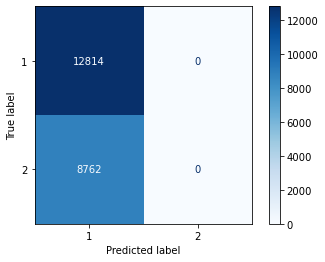

[100.   0.]


In [42]:
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
disp = ConfusionMatrixDisplay(confusion_matrix=c_m,
                             display_labels= '12')
disp.plot(cmap= 'Blues')
plt.show()

matrix = (c_m.diagonal()/c_m.sum(axis=1))*100
print(matrix)

#This is kind of weird and makes me think that either I did not do confusin matrix correctly or if our classes are
# unbalnced which would be really weird since by desgin it should be 50/50

### yeah this code is very wrong and I will have to fix it 